# Preprocessing sample data 

In [258]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#import tensorflow as tf

In [413]:
df_inp = pd.read_csv('Kmeans.csv')

In [414]:
df_inp.head()

,Lastnofitied,FirstNotifiedAt,SiteID,InstanceID,LTimeCluster,FTimeCluster,15minutelastcluster,15minutefirstcluster
0,1499855822,1499855822,3684492,24134,1499853600,1499853600,1499855400,1499855400
1,1500992767,1489833193,3606427,23473,1500991200,1489831200,1500992100,1489833000
2,1502538247,1487236451,3606357,23911,1502535600,1487235600,1502537400,1487235600
3,1505794196,1505794196,3658175,24092,1505793600,1505793600,1505793600,1505793600
4,1505940465,1500675765,3687379,23634,1505937600,1500674400,1505940300,1500675300


In [261]:
df_sample = df_inp.copy()
df_sample = df_sample[['FirstNotifiedAt','SiteID','InstanceID']]

In [262]:
df_sample.head()

,FirstNotifiedAt,SiteID,InstanceID
0,1499855822,3684492,24134
1,1489833193,3606427,23473
2,1487236451,3606357,23911
3,1505794196,3658175,24092
4,1500675765,3687379,23634


In [263]:
df_sample['Date'] = pd.to_datetime(df_sample['FirstNotifiedAt'], unit = 's')

In [264]:
df_sample.head()

,FirstNotifiedAt,SiteID,InstanceID,Date
0,1499855822,3684492,24134,2017-07-12 10:37:02
1,1489833193,3606427,23473,2017-03-18 10:33:13
2,1487236451,3606357,23911,2017-02-16 09:14:11
3,1505794196,3658175,24092,2017-09-19 04:09:56
4,1500675765,3687379,23634,2017-07-21 22:22:45


In [265]:
df_sample = df_sample[pd.unique(['Date']+df_sample.columns.values.tolist()).tolist()]
df_sample.head()

,Date,FirstNotifiedAt,SiteID,InstanceID
0,2017-07-12 10:37:02,1499855822,3684492,24134
1,2017-03-18 10:33:13,1489833193,3606427,23473
2,2017-02-16 09:14:11,1487236451,3606357,23911
3,2017-09-19 04:09:56,1505794196,3658175,24092
4,2017-07-21 22:22:45,1500675765,3687379,23634


In [266]:
df_data =  df_sample.copy()
#df_data.drop('FirstNotifiedAt',axis=1,inplace=True)
df_data = df_data.set_index('Date')
df_data.head()


,FirstNotifiedAt,SiteID,InstanceID
Date,,,
2017-07-12 10:37:02,1499855822,3684492,24134
2017-03-18 10:33:13,1489833193,3606427,23473
2017-02-16 09:14:11,1487236451,3606357,23911
2017-09-19 04:09:56,1505794196,3658175,24092
2017-07-21 22:22:45,1500675765,3687379,23634


In [267]:
df_data.index

DatetimeIndex(['2017-07-12 10:37:02', '2017-03-18 10:33:13',
               '2017-02-16 09:14:11', '2017-09-19 04:09:56',
               '2017-07-21 22:22:45', '2017-09-22 05:10:55',
               '2016-12-14 05:41:45', '2017-09-27 15:47:15',
               '2017-03-02 23:04:26', '2017-10-03 05:07:40',
               ...
               '2018-03-04 17:58:28', '2018-03-04 17:58:46',
               '2018-03-05 12:37:53', '2018-03-05 12:38:12',
               '2018-03-05 12:37:53', '2018-03-05 12:38:12',
               '2018-03-05 12:37:53', '2018-03-05 12:38:12',
               '2018-03-05 15:52:21', '2018-03-05 15:52:39'],
              dtype='datetime64[ns]', name='Date', length=11145, freq=None)

In [268]:
data = df_data.values
data

array([[1499855822,    3684492,      24134],
       [1489833193,    3606427,      23473],
       [1487236451,    3606357,      23911],
       ..., 
       [1520253492,      20002,      24217],
       [1520265141,      20001,      24216],
       [1520265159,      20001,      24216]], dtype=int64)

In [113]:
cluster_range=  range(100,400,50)
#cluster_range= [10,20,40,50,60,70,80,100]
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( data )
  cluster_errors.append( clusters.inertia_ )

In [114]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df.sort_values('cluster_errors',ascending=True)

,cluster_errors,num_clusters
5,3.417110e+04,350
4,7.630652e+04,300
3,1.798495e+05,250
2,4.646119e+05,200
1,1.274247e+06,150
0,4.277851e+06,100


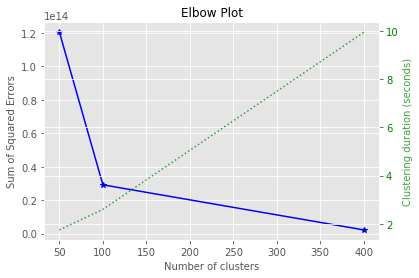

In [269]:
import scikitplot
%matplotlib inline
elbow_check = KMeans()
scikitplot.cluster.plot_elbow_curve(elbow_check,X=data,cluster_ranges = (100,400,50) )

In [270]:
num_clusters = 100
kmeans = KMeans( num_clusters )
kmeans.fit(data)

clusters = kmeans.predict(data)

In [271]:
len(clusters)

11145

In [272]:
df_data.shape

(11145, 3)

In [273]:
df_data.head()

,FirstNotifiedAt,SiteID,InstanceID
Date,,,
2017-07-12 10:37:02,1499855822,3684492,24134
2017-03-18 10:33:13,1489833193,3606427,23473
2017-02-16 09:14:11,1487236451,3606357,23911
2017-09-19 04:09:56,1505794196,3658175,24092
2017-07-21 22:22:45,1500675765,3687379,23634


In [274]:
df_data['Clusters'] = clusters

In [275]:
df_data.shape

(11145, 4)

In [276]:
df_data.head()

,FirstNotifiedAt,SiteID,InstanceID,Clusters
Date,,,,
2017-07-12 10:37:02,1499855822,3684492,24134,23
2017-03-18 10:33:13,1489833193,3606427,23473,96
2017-02-16 09:14:11,1487236451,3606357,23911,92
2017-09-19 04:09:56,1505794196,3658175,24092,84
2017-07-21 22:22:45,1500675765,3687379,23634,44


In [283]:
df_data.to_csv('NewCLuster.csv')

In [277]:
data2 = df_data.values
data2

array([[1499855822,    3684492,      24134,         23],
       [1489833193,    3606427,      23473,         96],
       [1487236451,    3606357,      23911,         92],
       ..., 
       [1520253492,      20002,      24217,         28],
       [1520265141,      20001,      24216,         28],
       [1520265159,      20001,      24216,         28]], dtype=int64)

In [281]:
data

array([[1499855822,    3684492,      24134],
       [1489833193,    3606427,      23473],
       [1487236451,    3606357,      23911],
       ..., 
       [1520253492,      20002,      24217],
       [1520265141,      20001,      24216],
       [1520265159,      20001,      24216]], dtype=int64)

In [278]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("centroids : ")
print(centroids)
print("labels : ")
print(labels)


centroids : 
[[  1.51592214e+09   3.65295018e+06   2.35806220e+04]
 [  1.50594674e+09   3.68127104e+06   2.34954620e+04]
 [  1.49013280e+09   3.67638513e+06   2.34699221e+04]
 [  1.51045178e+09   3.66686845e+06   2.37484655e+04]
 [  1.49872556e+09   3.68260100e+06   2.34630000e+04]
 [  1.51974936e+09   3.66612599e+06   2.35871230e+04]
 [  1.50853460e+09   3.67867800e+06   2.34948476e+04]
 [  1.51359275e+09   3.66967108e+06   2.35505429e+04]
 [  1.51885182e+09   2.00029091e+04   2.42179091e+04]
 [  1.51858175e+09   3.63024897e+06   2.35170745e+04]
 [  1.51160409e+09   3.90349891e+06   2.34661387e+04]
 [  1.51719843e+09   3.67181440e+06   2.36480777e+04]
 [  1.50129820e+09   3.65822800e+06   2.35400000e+04]
 [  1.51488927e+09   3.66136006e+06   2.35542745e+04]
 [  1.48788942e+09   3.71062000e+06   2.37890000e+04]
 [  1.49473036e+09   3.60746500e+06   2.38750000e+04]
 [  1.50937423e+09   3.66936151e+06   2.36424860e+04]
 [  1.51299962e+09   3.65866636e+06   2.35148547e+04]
 [  1.51639533e

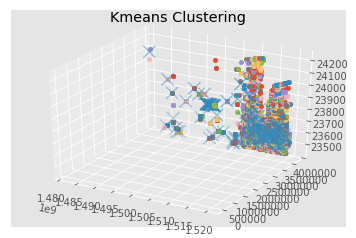

In [282]:
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

cluster_num = 100 
colors = ["g.","r.","c.","y."]

color = np.random.rand(cluster_num)

c = Counter(labels)


fig = figure()
ax = fig.gca(projection='3d')

fignum = 1

#fig = plt.figure(fignum, figsize=(20, 10))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for i in range(len(data2)):
    #print("coordinate:",data[i], "label:", labels[i])
    #print("i : ",i)
    #print("color[labels[i]] : ",color[labels[i]])
    #ax.scatter(data2[i][0], data2[i][1],data2[i][2],c=color[labels[i]])
    ax.scatter(data[i][0], data[i][1],data[i][2],c=None)
    #ax.scatter(data[i][0], data[i][1],c=color[labels[i]])


#for cluster_number in range(cluster_num):
  #print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100)
#ax.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 100)
#ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2],,marker = "x")
plt.title('Kmeans Clustering')
plt.show()

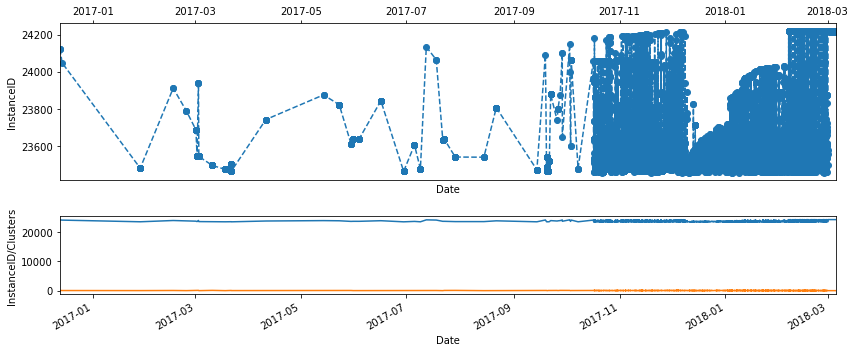

In [64]:
import matplotlib.gridspec as mgrid
fig = plt.figure(figsize=(12,5))
grid = mgrid.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

barax = fig.add_subplot(grid[0])
tsax = fig.add_subplot(grid[1])
df_data['InstanceID'].plot(ax=barax, style='o--')
barax.set_ylabel('InstanceID')
tsax.set_ylabel('InstanceID/Clusters')

barax.xaxis.tick_top()

df_data['InstanceID'].plot(ax=tsax)
df_data['Clusters'].plot(ax=tsax)
fig.tight_layout()

In [284]:
df_data.head()

,FirstNotifiedAt,SiteID,InstanceID,Clusters
Date,,,,
2017-07-12 10:37:02,1499855822,3684492,24134,23
2017-03-18 10:33:13,1489833193,3606427,23473,96
2017-02-16 09:14:11,1487236451,3606357,23911,92
2017-09-19 04:09:56,1505794196,3658175,24092,84
2017-07-21 22:22:45,1500675765,3687379,23634,44


# PROCESS THE DATA GENARATED AS A PART OF KMEAN CLUSTERING ALGORITHM

In [297]:
sample = df_data.copy()
sample = sample[['FirstNotifiedAt','InstanceID','Clusters']]
#

# Display first 5 rows of the Dataframe Sample

In [298]:
sample.head()

,FirstNotifiedAt,InstanceID,Clusters
Date,,,
2017-07-12 10:37:02,1499855822,24134,23
2017-03-18 10:33:13,1489833193,23473,96
2017-02-16 09:14:11,1487236451,23911,92
2017-09-19 04:09:56,1505794196,24092,84
2017-07-21 22:22:45,1500675765,23634,44


In [299]:
num_cluster = sample['Clusters'].unique()

In [300]:
len(num_cluster)

100

In [301]:
num_cluster

array([23, 96, 92, 84, 44,  1, 19, 74, 32, 41, 27,  2, 45, 15, 33, 54, 24,
       38, 43, 85, 14, 91, 42, 71, 12,  4, 34, 87,  6, 76, 30, 90, 70, 16,
       35, 56, 81, 94,  3, 52, 58, 83, 47, 26, 53, 78, 10, 65, 49, 95, 21,
       93, 63, 17, 75, 59,  7, 48, 79, 31, 99, 62, 13, 61, 73, 39, 25, 86,
       37,  0, 64, 88, 18, 51, 22, 69, 40, 97, 11, 67, 36, 57, 98, 80, 82,
       20, 46, 66, 89,  9, 60,  8, 50, 55, 77, 29, 68, 72,  5, 28], dtype=int64)

# Organizing DeviceIDs based on the clusters generated by K means Algorithm

In [305]:
dfnew = df_data.groupby(['FirstNotifiedAt','Clusters']).size().reset_index(name='Freq')

In [307]:
dfnew.head()

,FirstNotifiedAt,Clusters,Freq
0,1481595440,19,3
1,1481694105,19,1
2,1485591390,24,10
3,1487236451,92,2
4,1487889417,14,3


In [310]:
dfnew.shape

(2944, 3)

In [308]:
df_eval = dfnew[dfnew.Freq > 1]

In [309]:
df_eval.head()

,FirstNotifiedAt,Clusters,Freq
0,1481595440,19,3
2,1485591390,24,10
3,1487236451,92,2
4,1487889417,14,3
5,1488367450,32,8


In [311]:
df_eval.shape

(1157, 3)

** creating list variables dynamically **

In [312]:
df_e = df_eval.values
for items in df_e:
    vars()["list"+str(items[1])] = []

In [313]:
common_device= {}
test = sample.values
for items in df_e:
   list1 = []
   for i in test:
        if (i[0] == items[0]):  
             #print(i)
             list1.append(i[1])
             
   common_device[str(int(items[0]))+ "|" + str(int(items[1]))]= list1

In [315]:
dev_list = []
for K,V in common_device.items():
   
   dev_list.append(V)

In [316]:
dev_list[0]

[23548, 23548]

In [317]:
new_list = []
for items in dev_list:
    k = dev_list.count(items)
    if [items,k] not in new_list:
        new_list.append([items,k])
        
#eliminating duplicates 
list_no_dup_dev = []
[list_no_dup_dev.append(item) for item in new_list if item not in list_no_dup_dev]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [318]:
len(list_no_dup_dev)

748

In [324]:

grp = sample.values
grp = grp.tolist()
grp

[[1499855822, 24134, 23],
 [1489833193, 23473, 96],
 [1487236451, 23911, 92],
 [1505794196, 24092, 84],
 [1500675765, 23634, 44],
 [1506057055, 23878, 1],
 [1481694105, 24048, 19],
 [1506527235, 23876, 74],
 [1488495866, 23939, 32],
 [1507007260, 24149, 41],
 [1507008905, 23997, 41],
 [1481595440, 24123, 19],
 [1496211043, 23639, 27],
 [1490128246, 23502, 2],
 [1507081711, 24061, 41],
 [1489183306, 23495, 45],
 [1494730362, 23875, 15],
 [1503345902, 23806, 33],
 [1505935775, 23467, 1],
 [1499560971, 23476, 23],
 [1500754486, 23636, 44],
 [1495513520, 23822, 54],
 [1488367450, 23687, 32],
 [1485591390, 23480, 24],
 [1488513366, 23543, 32],
 [1491855279, 23742, 38],
 [1496504200, 23637, 27],
 [1497589877, 23843, 43],
 [1488427825, 23544, 32],
 [1502725501, 23539, 85],
 [1487889417, 23789, 14],
 [1506417997, 23798, 74],
 [1507050351, 23602, 41],
 [1506379496, 23737, 74],
 [1496100851, 23612, 27],
 [1506636165, 24099, 74],
 [1499266016, 23605, 23],
 [1507422991, 23478, 91],
 [1505851807, 2

In [326]:
dict_cluster = {}
for i in range(0,len(num_cluster)):
        #print('The number of elements in  SET'+str(num_cluster[i])+' : ',len(vars()["set"+str(num_cluster[i])]))
        #print('The Contents of SET'+str(num_cluster[i])+' : ',vars()["set"+str(num_cluster[i])])
        #print('\n')
        dict_cluster[i] = vars()["set"+str(num_cluster[i])]

In [327]:
len(dict_cluster)

100

# creating list variables dynamically 

In [332]:
# adding only those device sets which have a cardinality GE 1
list_set1 =[]
for i in range(0,len(num_cluster)):
    if len(vars()["set"+str(num_cluster[i])]) > 1:
        list_set1.append(vars()["set"+str(num_cluster[i])])
    else:
        print(vars()["set"+str(num_cluster[i])])
        

In [331]:
len(list_set1)

100

# JACCARD INDEX: jaccard.JPG










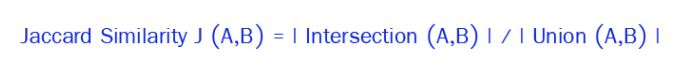

























The Jaccard index, also known as Intersection over Union and the Jaccard similarity coefficient , is a statistic used for comparing the similarity and diversity of sample sets. 

The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets


# Group all the sets created into a list, the count of which will be used for iterating trough jaccard index calculation for each corresponding set

In [333]:
list_set1[8]

{23462, 23475, 23488, 23496, 23543, 23544, 23687, 23939}

** Jaccard Index Calculation Function **

In [338]:
def jaccard_similarity(x,y):
     intersection_dev =  set.intersection(*[set(x), set(y)])
     intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
     intersection_dev =  set.intersection(*[set(x), set(y)])
     union_cardinality = len(set.union(*[set(x), set(y)]))
     #print('intersection : ',intersection_cardinality)
     #print('union_cardinality: ',union_cardinality)
     #print('Common devices : ', intersection_dev)
     if union_cardinality > 0:
        similar = intersection_cardinality/float(union_cardinality)
        
     else:
        similar = 0.0
        
     #if similar > 0.35:
        #print('JACCARD SIMILARITY value :',similar )
        #print('Common devices : ', intersection_dev)
                   
        
        
    
     return (similar,intersection_dev)

In [340]:
import time
from datetime import datetime
start = time.time()
start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start))
print('start time : ',start_time)


list_linked1 = []
for q in range(0,len(list_set1)):
    #print(list_set[q])
    outk = [k for k, v in dict_cluster.items() if v == list_set1[q]]
    #outk = get_keys(list_set1[q])
    #print(outk)
    for i in range(0,len(list_set1)):
        ink = [k1 for k1, v1 in dict_cluster.items() if v1 == list_set1[i]]
        #ink = get_keys(list_set1[i])
       #print(i)
       #if outk != ink :
        if i > q :
           #if set(list_set1[q]) != set(list_set1[i]):
            
           r,common_dev = jaccard_similarity(list_set1[q], list_set1[i])
           
           if (r > 0.0) :
            #print('Common Devices: ',common_dev)
            #print('jaccard_distance  for set',q,' and set',i,' is : ',r,'Common Devices',common_dev)
            list_linked1.append(('SET'+str(outk),'SET'+str(ink),common_dev,r))
            
            

end = time.time()
end_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end))
print('end time : ',end_time)
print('time taken for jaccard to complete', 'clusters : ',(end - start) ,' seconds.')

start time :  2018-07-23 19:44:35
end time :  2018-07-23 19:44:36
time taken for jaccard to complete clusters :  0.6324999332427979  seconds.


In [341]:
a = []
for items in list_linked1:
    a.append(items[2])

In [342]:
list_linked_no_dup =[]
[list_linked_no_dup.append(item) for item in a if item not in list_linked_no_dup]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [343]:
len(list_linked1)

2761

** Jaccard iterations **

Creating sets from the list of linked devices derived in the previous step and find out the similarity score between these sets.¶

In [349]:
import datetime
now = datetime.datetime.now()
loop = 0
no_of_loop_list = []
listname = list_linked_no_dup
pred_device_filename = 'D:\\linkeddeviceJaccard-' + str(now.isoformat()).replace(":","")+'.txt'

predfile = open(pred_device_filename,'w') 
while True:

     loop = loop + 1
     vars()["list_set"+str(loop)] =[]
     vars()["list_linked"+str(loop)]  = []
     for i in range(0,len(listname)):
            vars()["SET"+str(i)]= listname[i]
            #print('The number of elements in  SET'+str(i)+' : ',len(vars()["SET"+str(i)]))
            #print('The Contents of SET'+str(i)+' : ',vars()["SET"+str(i)])
            #print('\n')
     list_set_loop =[]
     for i in range(0,len(listname)):
             if len(vars()["SET"+str(i)]) > 1:
                    list_set_loop.append(vars()["SET"+str(i)])          
     
     #list_set = vars()["list_linked"+str(loop)]
     #print(list_set)

     common_devices = []
     for q in range(0,len(list_set_loop)):
        
        #outk = [k for k, v in dict_cluster.items() if v == list_set_2[q]]
         #print(list_set[q])
        for i in range(0,len(list_set_loop)):
             #ink = [k1 for k1, v1 in dict_cluster.items() if v1 == list_set_2[i]]
             #print(i)
             if i > q :
                 r,common_dev  = jaccard_similarity(list_set_loop[q], list_set_loop[i])
                 #print('r : ',r)
                 if (r >= 0.80):
                      print('jaccard_distance : ',r,'common device : ',common_dev)
                      #vars()["list_linked"+str(loop)].append(('SET'+str(q),'SET'+str(i),common_dev))
                      common_devices.append(common_dev)
                      #list_linked_2.append((q,i,list_set[q],list_set[i]))
                 
                    
  
     pred_linked_devices = []
     for item in common_devices:
            if item not in pred_linked_devices:
                 pred_linked_devices.append(item) 
                    
     if len(pred_linked_devices) >= 1:
        listname = pred_linked_devices   
        print(len(listname))
        print('Loop : ',loop)
        predfile.write('Loop : '+ str(loop))
        predfile.write('\n')
        print('============================================================')
        predfile.write('============================================================')
        predfile.write('\n')
        print('length of pred linked device',len(pred_linked_devices))
        predfile.write('length of pred linked device : '+ str(len(pred_linked_devices)))
        print('\n')
        predfile.write('\n')
        predfile.write('============================================================')
        predfile.write('\n')
        print('Linked Devices : ')
        predfile.write('Linked Devices having jaccard score > 0.50 : ')
        predfile.write('\n')
        print('============================================================')
        print('\n')
        predfile.write('\n')
        vars()["list_linked"+str(loop)] = pred_linked_devices
        no_of_loop_list.append(vars()["list_linked"+str(loop)])
        print(pred_linked_devices)
        predfile.write(str(pred_linked_devices))
        predfile.write('\n')
        predfile.write('============================================================')
        predfile.write('\n')
        print('============================================================')
        print('\n')
     else:
        break

predfile.close()

jaccard_distance :  0.8 common device :  {23666, 23667, 23668, 23669}
jaccard_distance :  0.8 common device :  {24216, 24217, 24218, 24220}
jaccard_distance :  0.8 common device :  {24216, 24217, 24218, 24219}
jaccard_distance :  0.9090909090909091 common device :  {23776, 23748, 23788, 23756, 23757, 23730, 23731, 23732, 23736, 23769}
jaccard_distance :  0.8333333333333334 common device :  {23776, 23748, 23788, 23756, 23757, 23730, 23731, 23732, 23736, 23769}
jaccard_distance :  0.9166666666666666 common device :  {23776, 23748, 23722, 23788, 23756, 23757, 23730, 23731, 23732, 23736, 23769}
jaccard_distance :  0.8333333333333334 common device :  {23748, 23722, 23788, 23756, 23757, 23730, 23731, 23732, 23736, 23769}
jaccard_distance :  0.9166666666666666 common device :  {23748, 23722, 23788, 23756, 23757, 23730, 23731, 23732, 23602, 23736, 23769}
jaccard_distance :  0.8 common device :  {23552, 23482, 24058, 23477}
jaccard_distance :  0.8 common device :  {23498, 23482, 23563, 23477}
j

In [350]:
no_of_loop_list[-1]

[{23730, 23731, 23732, 23736, 23748, 23756, 23757, 23769, 23788},
 {23485, 23556, 23613, 23646}]

** Determine Parent Child Relationship for the predicted linked device sets **

In [351]:
temp_list_dev = []
if len(no_of_loop_list) > 0 :
    Linked_Devices = no_of_loop_list[-1]
else:
    for items in list_linked_no_dup:
        if len(items) > 1:
            temp_list_dev.append(items)
    Linked_Devices = temp_list_de

In [352]:
Linked_Devices

[{23730, 23731, 23732, 23736, 23748, 23756, 23757, 23769, 23788},
 {23485, 23556, 23613, 23646}]

In [359]:
clst = []
list4 = []
Parent = []
Child = []
Jsc = []
seta = []
setb = []

filename1 = 'D:\\DeviceCluster-' + str(now.isoformat()).replace(':','')+'.txt'
filename2 = 'D:\\ParentChildRelationship-' + str(now.isoformat()).replace(':','')+'.txt'

device_cluster1 = open(filename1,'w')
parent_child = open(filename2,'w')
for items in Linked_Devices:
    list1 = list(items)
    device_list =[]
    cluster_list =[]
    for j in range(len(list1)):
        
        #print(list1[j])
        df1 = sample[sample['InstanceID'] == list1[j]]
        dev2 =df1['Clusters'].values
        list2 = set(dev2)
        list3 = list(list2)
        device_list.append(list1[j])
        cluster_list.append(list2)
        device_cluster1.write(str(list1[j])+" : " + str(list2)+ "\n")
    device_cluster1.write("=====================================================================\n")    
        
    for q in range(len(cluster_list)):
        for i in range(len(cluster_list)):
            if i > q :
                 r,common_dev  = jaccard_similarity(cluster_list[q], cluster_list[i])
                 if r >= 0.50:
                    print("Cluster 1 : ",cluster_list[q])
                    print("Device id 1 : ",device_list[q])
                    print("Cluster 2 : ",cluster_list[i])
                    print("Device id 2 : ",device_list[i])
                    print("jaccard score :" , r)
                    print("Common Devices : ",common_dev)
                    parent_child.write("Device id 1 : " + str(device_list[q])+"\n")
                    parent_child.write("Cluster 1 : " + str(cluster_list[q])+"\n")
                    parent_child.write("\n")
                    parent_child.write("Device id 2 : " + str(device_list[i])+"\n")
                    parent_child.write("Cluster 2 : " + str(cluster_list[i])+"\n")
                    parent_child.write("\n")
                    parent_child.write("Jaccard score : " + str(r)+"\n")
                    parent_child.write("Common Device : " + str(common_dev) + "\n")
                    parent_child.write("\n")
                
                    if len(cluster_list[q]) > len(cluster_list[i]):
                        print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                        print("\n")
                        parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                        Parent.append(device_list[q])
                        Child.append(device_list[i])
                        Jsc.append(r)
                        
                        
                    else:
                        if len(cluster_list[q]) == len(cluster_list[i]) and r == 1.0:
                            print( str(device_list[q]) + " present in same clusters " + str(device_list[i]))
                            print("\n")
                            parent_child.write(str(device_list[q]) + " present in same clusters " + str(device_list[i])+"\n")
                           
                        else:
                            if len(cluster_list[q]) == len(cluster_list[i]) and r < 1.0:
                                 print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                                 print("\n")
                                 parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                                 Parent.append(device_list[q])
                                 Child.append(device_list[i])
                                 Jsc.append(r)
                            else:
                                 print( str(device_list[q]) + " is child to " + str(device_list[i]))
                                 print("\n")
                                 parent_child.write(str(device_list[q]) + " is child to " + str(device_list[i])+"\n")
                                 Parent.append(device_list[i])
                                 Child.append(device_list[q])
                                 Jsc.append(r)
                    parent_child.write("========================================================================\n")
                    
        
                            
                        
                            
        
device_cluster1.close()   
parent_child.close()

Cluster 1 :  {40, 37, 52, 61, 22}
Device id 1 :  23748
Cluster 2 :  {98, 37, 52, 61, 22}
Device id 2 :  23788
jaccard score : 0.6666666666666666
Common Devices :  {61, 52, 37, 22}
23748 is parent to 23788


Cluster 1 :  {40, 37, 52, 61, 22}
Device id 1 :  23748
Cluster 2 :  {40, 37, 52, 61, 22}
Device id 2 :  23756
jaccard score : 1.0
Common Devices :  {40, 61, 52, 37, 22}
23748 present in same clusters 23756


Cluster 1 :  {40, 37, 52, 61, 22}
Device id 1 :  23748
Cluster 2 :  {98, 37, 52, 61, 22}
Device id 2 :  23757
jaccard score : 0.6666666666666666
Common Devices :  {61, 52, 37, 22}
23748 is parent to 23757


Cluster 1 :  {40, 37, 52, 61, 22}
Device id 1 :  23748
Cluster 2 :  {98, 37, 40, 52, 22, 61}
Device id 2 :  23730
jaccard score : 0.8333333333333334
Common Devices :  {40, 61, 52, 37, 22}
23748 is child to 23730


Cluster 1 :  {40, 37, 52, 61, 22}
Device id 1 :  23748
Cluster 2 :  {40, 37, 52, 61, 22}
Device id 2 :  23731
jaccard score : 1.0
Common Devices :  {40, 61, 52, 37,

23556 is parent to 23485


Cluster 1 :  {0, 5, 9, 11, 13, 20, 29, 31, 36, 37, 40, 48, 50, 51, 57, 60, 62, 64, 66, 67, 69, 73, 79, 86, 88, 97, 98, 99}
Device id 1 :  23646
Cluster 2 :  {0, 64, 98, 67, 36, 69, 66, 5, 9, 42, 11, 77, 50, 51, 20, 88, 60, 29}
Device id 2 :  23485
jaccard score : 0.5333333333333333
Common Devices :  {0, 64, 66, 67, 98, 69, 5, 36, 9, 11, 50, 51, 20, 88, 60, 29}
23646 is parent to 23485




In [361]:
df_jaccard = pd.DataFrame({"Parent":Parent,"Child":Child,"Similarity_Score":Jsc})
df_jaccard = df_jaccard[['Parent','Child','Similarity_Score']]
df_jaccard.head()

,Parent,Child,Similarity_Score
0,23748,23788,0.666667
1,23748,23757,0.666667
2,23730,23748,0.833333
3,23748,23736,0.666667
4,23769,23748,0.833333


In [362]:
df_jaccard_same = df_jaccard.groupby('Parent')[['Child']].size().reset_index(name='Freq')
df_jaccard_same

,Parent,Freq
0,23556,3
1,23646,1
2,23730,7
3,23731,1
4,23732,1
5,23748,3
6,23756,2
7,23757,3
8,23769,7
9,23788,4


In [365]:
a = df_jaccard.pivot(index='Parent',columns='Child',values='Similarity_Score').fillna(0.0)

In [366]:
a

Child,23485,23613,23646,23731,23732,23736,23748,23756,23757,23788
Parent,,,,,,,,,,
23556,0.515152,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23646,0.533333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23730,0.000000,0.0,0.0,0.833333,0.833333,0.571429,0.833333,0.833333,0.833333,0.833333
23731,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000
23732,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000
23748,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.000000,0.666667,0.666667
23756,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.000000,0.666667,0.000000
23757,0.000000,0.0,0.0,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000
23769,0.000000,0.0,0.0,0.833333,0.833333,0.571429,0.833333,0.833333,0.833333,0.833333


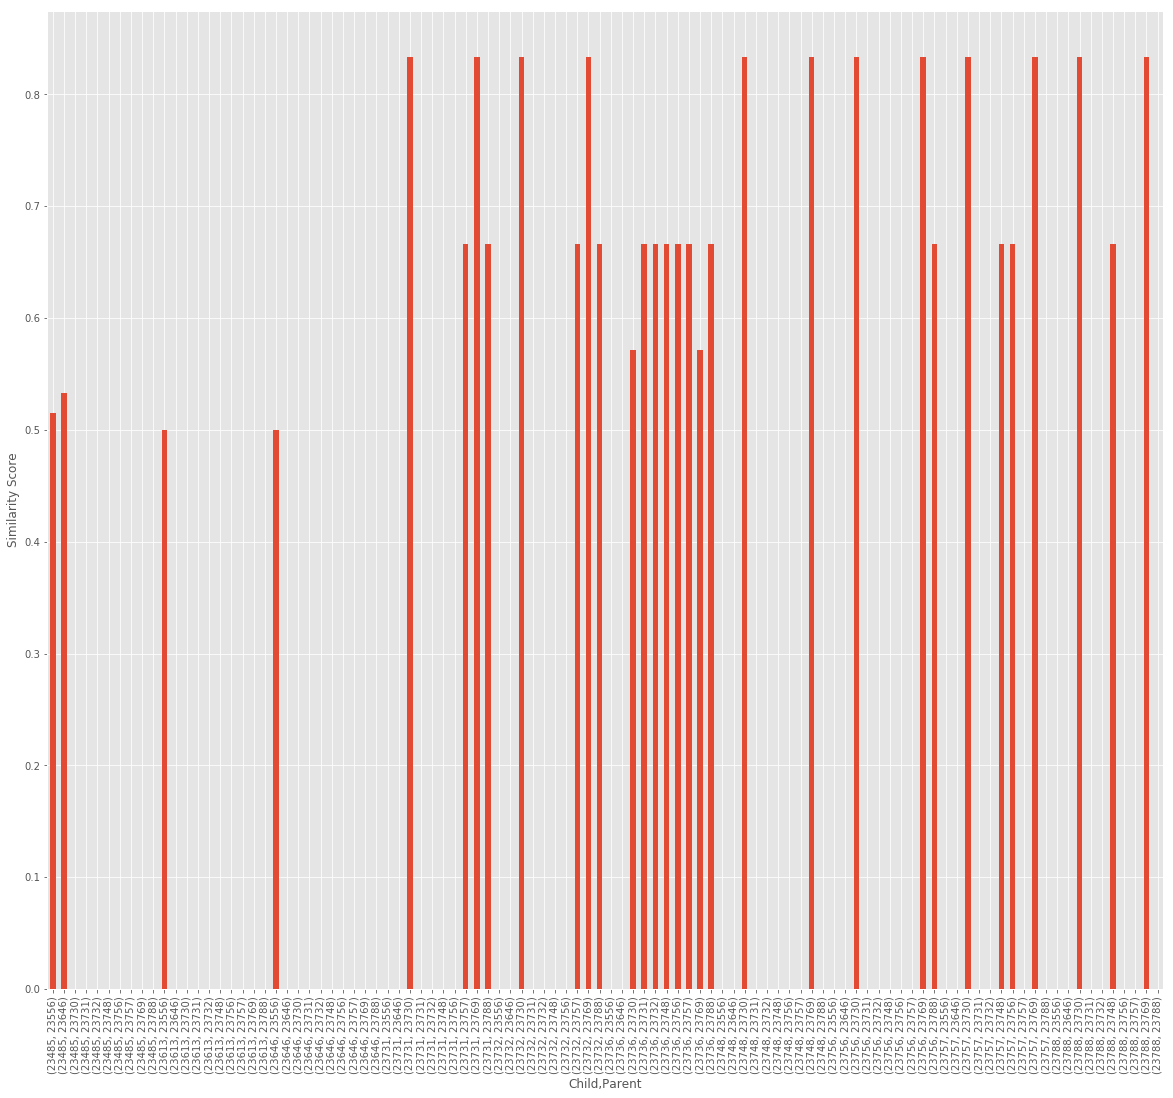

In [368]:
plt.figure(figsize=(20,18))
a.unstack('Parent').plot(kind='bar')
plt.ylabel('Similarity Score')

In [373]:
df_rel1 = pd.crosstab(df_jaccard.Parent,df_jaccard.Child)
df_rel = df_jaccard[['Parent','Child']]

In [371]:
df_rel1.to_csv("parent_child.csv",index=False)

In [372]:
df_rel1.columns

Int64Index([23485, 23613, 23646, 23731, 23732, 23736, 23748, 23756, 23757,
            23788],
           dtype='int64', name='Child')

In [392]:
Q = df_rel.values

In [393]:
Q

array([[23748, 23788],
       [23748, 23757],
       [23730, 23748],
       [23748, 23736],
       [23769, 23748],
       [23788, 23756],
       [23730, 23788],
       [23788, 23731],
       [23788, 23732],
       [23788, 23736],
       [23769, 23788],
       [23756, 23757],
       [23730, 23756],
       [23756, 23736],
       [23769, 23756],
       [23730, 23757],
       [23757, 23731],
       [23757, 23732],
       [23757, 23736],
       [23769, 23757],
       [23730, 23731],
       [23730, 23732],
       [23730, 23736],
       [23731, 23736],
       [23769, 23731],
       [23732, 23736],
       [23769, 23732],
       [23769, 23736],
       [23556, 23613],
       [23556, 23646],
       [23556, 23485],
       [23646, 23485]], dtype=int64)

In [376]:
import networkx as nx
G = nx.DiGraph()
edge_labels = dict()

In [403]:
for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
        G.add_edge(i,j, label=str(Q[i][j]))
        edge_labels[(i, j)] = Q[i][j]

In [404]:
label_mapping = {idx: val for idx, val in enumerate(df_rel.columns)}

In [405]:
label_mapping

{0: 'Parent', 1: 'Child'}

In [406]:
edge_labels

{(0, 0): 23748,
 (0, 1): 23788,
 (1, 0): 23748,
 (1, 1): 23757,
 (2, 0): 23730,
 (2, 1): 23748,
 (3, 0): 23748,
 (3, 1): 23736,
 (4, 0): 23769,
 (4, 1): 23748,
 (5, 0): 23788,
 (5, 1): 23756,
 (6, 0): 23730,
 (6, 1): 23788,
 (7, 0): 23788,
 (7, 1): 23731,
 (8, 0): 23788,
 (8, 1): 23732,
 (9, 0): 23788,
 (9, 1): 23736,
 (10, 0): 23769,
 (10, 1): 23788,
 (11, 0): 23756,
 (11, 1): 23757,
 (12, 0): 23730,
 (12, 1): 23756,
 (13, 0): 23756,
 (13, 1): 23736,
 (14, 0): 23769,
 (14, 1): 23756,
 (15, 0): 23730,
 (15, 1): 23757,
 (16, 0): 23757,
 (16, 1): 23731,
 (17, 0): 23757,
 (17, 1): 23732,
 (18, 0): 23757,
 (18, 1): 23736,
 (19, 0): 23769,
 (19, 1): 23757,
 (20, 0): 23730,
 (20, 1): 23731,
 (21, 0): 23730,
 (21, 1): 23732,
 (22, 0): 23730,
 (22, 1): 23736,
 (23, 0): 23731,
 (23, 1): 23736,
 (24, 0): 23769,
 (24, 1): 23731,
 (25, 0): 23732,
 (25, 1): 23736,
 (26, 0): 23769,
 (26, 1): 23732,
 (27, 0): 23769,
 (27, 1): 23736,
 (28, 0): 23556,
 (28, 1): 23613,
 (29, 0): 23556,
 (29, 1): 23646,


In [408]:
G = nx.DiGraph()
edge_labels = dict()
for line in df_jaccard.values:
    node1, node2, weight1 = line[0],line[1],line[2]
    length = float(weight1) # the length should be a float
    G.add_edge(node1, node2, label=str(weight1), length=length)
    edge_labels[(node1, node2)] = weight1 # store the string version as a label


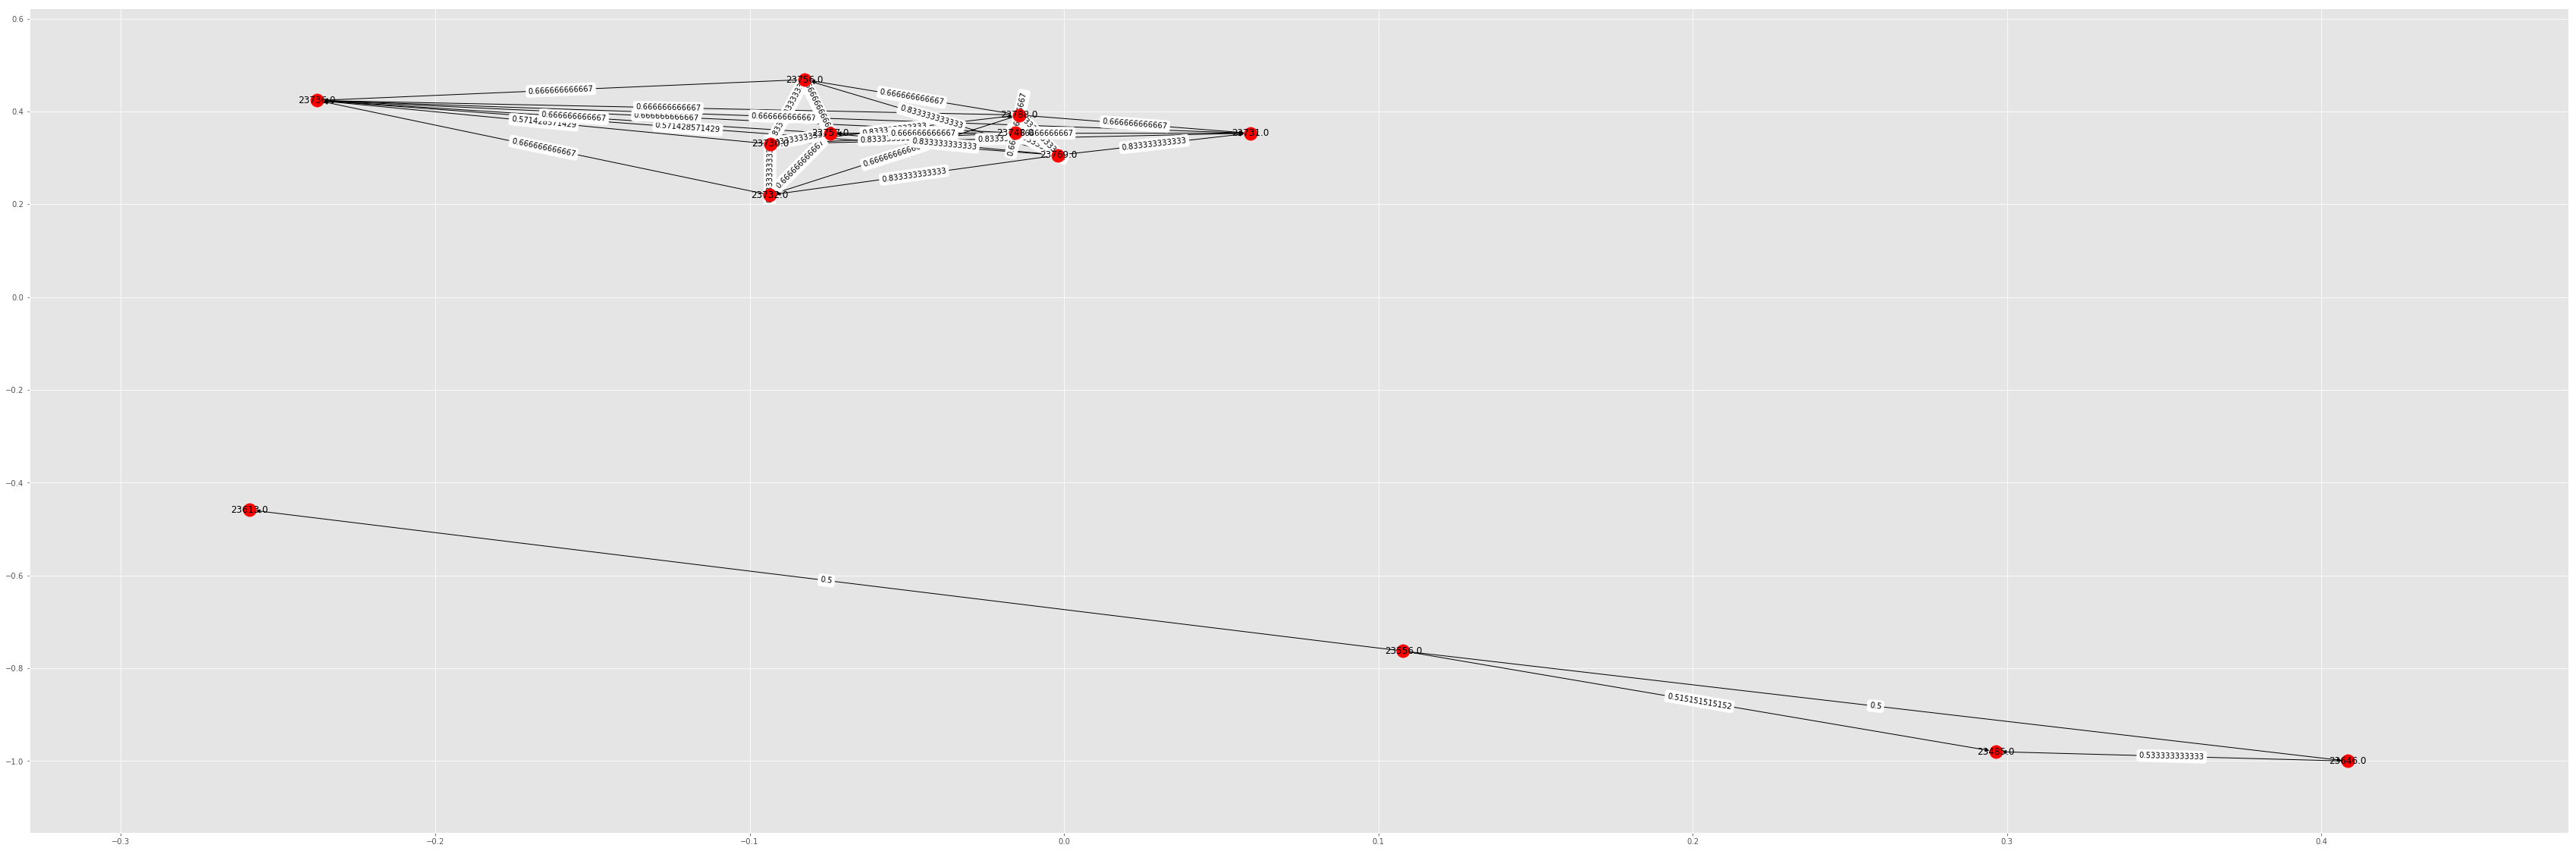

In [412]:
# Draw the graph
plt.figure(figsize=(60,20))
pos = nx.spring_layout(G) # set the positions of the nodes/edges/labels
nx.draw_networkx(G, pos=pos) # draw everything but the edge labels
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [456]:
#G = nx.relabel_nodes(G, label_mapping)

In [457]:
#G.edges(data=True)

In [385]:
plt.figure(figsize=(40,18))

In [389]:
G.add_nodes_from(df_rel.Parent.unique())
G.add_edges_from(df_rel.Child.values.tolist())



TypeError: object of type 'int' has no len()

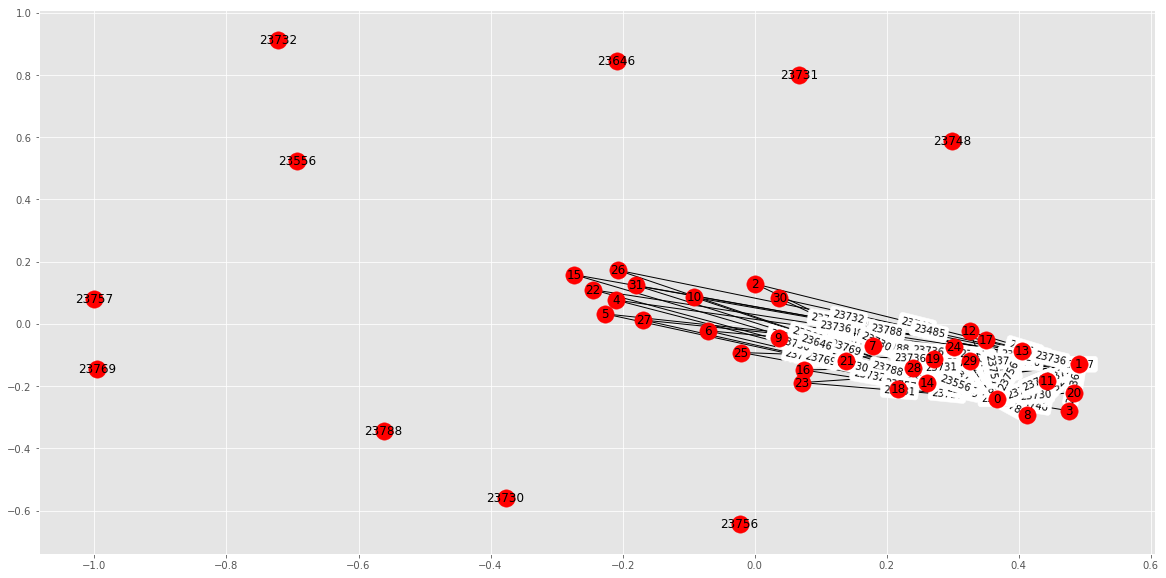

In [386]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
pos = nx.spring_layout(G,k=0.100,iterations=10) # set the positions of the nodes/edges/labels
nx.draw_networkx(G, pos=pos) # draw everything but the edge labels
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [365]:
device_rel

[]

In [123]:
for items in device_rel:
    print(item)

{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
{23592, 23593, 23596, 23589}
